In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [4]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
breast_cancer_dataset.target[90]

1

In [5]:
data_frame['label'] = breast_cancer_dataset.target

In [6]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
x = data_frame.drop(columns='label', axis = 1)
y = data_frame['label']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [11]:
## Building a Neural Network
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [12]:
# setting up the layers of neural network
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(30,)),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(2,activation='sigmoid')
])

In [13]:
## compiling neural network
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
## training neural network
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10


13/13 [==============================] - 2s 34ms/step - loss: 1.0526 - accuracy: 0.3961 - val_loss: 0.7971 - val_accuracy: 0.5435
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6684 - accuracy: 0.6039 - val_loss: 0.4998 - val_accuracy: 0.8043
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4409 - accuracy: 0.8142 - val_loss: 0.3437 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.3218 - accuracy: 0.8924 - val_loss: 0.2649 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 0.2554 - accuracy: 0.9169 - val_loss: 0.2202 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 0.2157 - accuracy: 0.9340 - val_loss: 0.1923 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1898 - accuracy: 0.9413 - val_loss: 0.1718 - val_accuracy: 0.9783
Epoch 8/10
13/13 

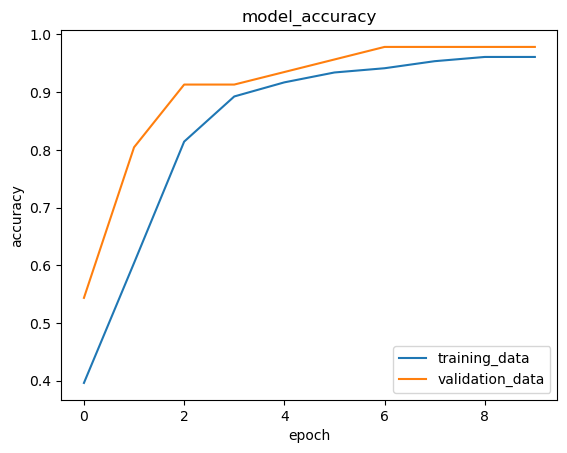

In [16]:
## visualizing accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['training_data','validation_data'], loc = 'lower right')

In [17]:
loss, accuracy = model.evaluate(x_test_std, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9561


In [18]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 2ms/step


In [19]:
print(y_pred.shape)
print(y_pred[0])
## gives probability for predicting '0' and '1'

(114, 2)
[0.41996247 0.47269586]


In [24]:
## model.predict() gives prediction probability of each class for each data point

In [25]:
## converting prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]

In [ ]:
## building the predictive system ,, place data points in input data
input_data = ()

## change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

## standardizing input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

prediction_label = [np.argmax(prediction)]

if(prediction_label[0] == 0):
    print('The Tumor is Malignant')
else:
    print("The Tumor is Benign")